**DETERMINING THE FACTORS MICROSOFT,A NEW ENTRANT IN THE MOVIE PRODUCTION INDUSTRY, SHOULD CONSIDER TO ATTAIN SUCCESS USING EXPLORATORY DATA ANALYSIS**

**PROJECT OVERVIEW**

This project uses data named zippedData which includes movie datasets derived from Box Office Mojo, IMBD, Rotten Tomatoes, The MovieDB, and The Numbers. The project will utilize various data files to conduct an exploratory analysis with an aim of deriving recommendations to the Microsoft new movies studio on what movies to produce. 


**PROBLEM STATEMENT**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

The objectives of this Exploratory Data Analysis include the following;
* To determine the most profitable studios which canbe used for benchmarking
* To determine what genre is most profitable
* To determine the cost of producing the most profitable movies 

**DATA PRE-PROCESSING**

In this analysis we will use data drom zippedData file but especially the following data files:

* imdb.title.basics
* imdb.title.ratings
* bom.movie_gross 
* tn.movie_budgets

lets start by importing pandas and numpy

In [2]:
# import pandas and numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# uploading and reading files
movie_gross = pd.read_csv('bom.movie_gross.csv', index_col = 0) #reads the bom.movie_gross. csv file
title_basics = pd.read_csv('title.basics.csv', index_col = 0) #reads the title.basics.csv file
title_ratings = pd.read_csv('title.ratings.csv', index_col = 0) 
movie_budgets = pd.read_csv('tn.movie_budgets.csv.gz', index_col = 0)


In [4]:
movie_gross.head() #opens the first 5 observations

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
title_basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [7]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


**DATA SET 'movie_gross' PREPROCESSING**

In [8]:
movie_gross.tail()#prints the last five observations

,studio,domestic_gross,foreign_gross,year
title,,,,
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018
The Swan,Synergetic,2400.0,NaN,2018
An Actor Prepares,Grav.,1700.0,NaN,2018


lets check the summary of the 'movie_gross'data set to have an idea of what we are dealing with. 

In [6]:
movie_gross.info()#printing the summary of the dataframe using the .info() function

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [9]:
movie_gross.shape #checks the number of rows and columns in the dataset.

(3387, 4)

In [6]:
type('movie_gross')# checks the type of the data

str

**Checking for duplicates**

In [7]:
movie_gross.duplicated().value_counts() #checks and generates the number of duplicated values in the data set

False    3376
True       11
dtype: int64

The output above indicates that they are 11 duplicates in the data. lets check the duplicates in the cell below.

In [8]:
movie_gross.duplicated(keep=False)

title
Toy Story 3                                    False
Alice in Wonderland (2010)                     False
Harry Potter and the Deathly Hallows Part 1    False
Inception                                      False
Shrek Forever After                            False
                                               ...  
The Quake                                      False
Edward II (2018 re-release)                    False
El Pacto                                       False
The Swan                                       False
An Actor Prepares                              False
Length: 3387, dtype: bool

**Checking missing data**

In [188]:
movie_gross.isna() # checks the missing values

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,False,False,False,False
Alice in Wonderland (2010),False,False,False,False
Harry Potter and the Deathly Hallows Part 1,False,False,False,False
Inception,False,False,False,False
Shrek Forever After,False,False,False,False
...,...,...,...,...
The Quake,False,False,True,False
Edward II (2018 re-release),False,False,True,False
El Pacto,False,False,True,False


In [187]:
movie_gross.isna().sum() # checks the sum of missing data in the dataframe


studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Now that we know that there are missing values in the columns 'studio', 'domestic_gross',and 'foreign_gross', we will examine the columns closely.we will check the percentage of missing rows in the colums and also check the the number of unique values in the columns.

In [10]:
len(movie_gross[movie_gross.studio.isna()])/ len(movie_gross) # checks % of missing rows in 'studio'

0.0014762326542663124

In [11]:
len(movie_gross[movie_gross.domestic_gross.isna()])/ len(movie_gross) # checks % of missing rows in 'domestic_gross' 

0.008266902863891349

In [12]:
len(movie_gross[movie_gross.foreign_gross.isna()])/ len(movie_gross) #checks% of missing rows in 'foreign_gross'

0.3985828166519043

In [13]:
movie_gross.studio.nunique() #checks unique values in column 'studio'

257

In [14]:
movie_gross.domestic_gross.nunique() # checks unique values in column 'domestic_gross'

1797

In [15]:
movie_gross.foreign_gross.nunique() # checks unique values in 'foreign_gross'

1204

since we have identified the missing data percentage and the unique values in the colums, we will then continue to deal with the missing data in each column separately

**Replacing** the mising values in column 'studio' using forward fill

In [11]:
movie_gross['studio'].fillna(method='ffill', inplace=True) #forward filling missing values using .finna() 

In [12]:
movie_gross['studio'].isna().sum() #confirms replacement was successfull.

0

**Replacing** the missing values in column 'domestic_gross' using the **median** in the cells below

In [39]:
movie_gross['domestic_gross'].median() #generates the median

print("Median is", movie_gross['domestic_gross'].median()) #prints out the median

Median is 1400000.0


In [40]:
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(value=movie_gross['domestic_gross'].median) 
# fills in the the missing value using the median value

In [41]:
movie_gross['domestic_gross'].isna().sum() #confirms that missing 

0

**Replacing** the missing values in foreign_gross with 0

In [14]:
movie_gross['foreign_gross'].fillna(value= 0, inplace=True) #replaces missing values with 0

In [15]:
movie_gross['foreign_gross'].isna().sum() confirms replacement

0

In [23]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   3387 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


**DATA SET 'title_basics'PREPROCESSING**

In [189]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [17]:
title_basics.isna() #checks whether they are missing values

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,False,False,False,False,False
tt0066787,False,False,False,False,False
tt0069049,False,False,False,False,False
tt0069204,False,False,False,True,False
tt0100275,False,False,False,False,False
...,...,...,...,...,...
tt9916538,False,False,False,False,False
tt9916622,False,False,False,True,False
tt9916706,False,False,False,True,False


In [190]:
title_basics.isna().sum() #checks the total number of missing values

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

From the cell above, it is clear that we have 21 missing values in the 'original_title' column, 31739 in the 'runtime_minutes' column and 5408 in the 'genres' column.lets check the percentage of unique values in the dataset using the specific columns so as to determine the best method to handle the missing values.

In [20]:
len(title_basics[title_basics.original_titple.isna()])/ len(title_basics) # checks % of missing rows in 'original_title'

0.00014369389095686446

In [21]:
len(title_basics[title_basics.runtime_minutes.isna()])/ len(title_basics) # checks % of missing rows in 'runtime_minutes'

0.21717620976571053

In [22]:
len(title_basics[title_basics.genres.isna()])/ len(title_basics) # checks % of missing rows in 'genres'

0.037004598204510616

To deal with missing data in the data set, we will;
* **Replace** missing values of the 'original title' with the value of its 'primary_title'
* **Fill** in the missing values in 'runtime_minutes' with forwad fill
* **Replace** missing values in 'genres' eith the value 'Missing'

In [193]:
title_basics['original_title'].fillna(value= 'primary_title', inplace=True)

In [194]:
title_basics['runtime_minutes'].fillna(method='ffill', inplace=True)

In [195]:
title_basics['genres'].fillna(value= 'Missing', inplace=True) 

In [196]:
title_basics.isna().sum() #confirms replacement was successfull

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [33]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146144 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  146144 non-null  float64
 4   genres           146144 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


**DATA SET 'title_ratings' PRE PROCESSING**

In [34]:
title_ratings.info() # checks the info of the data frame

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [197]:
title_ratings.shape # checks the number of rows and columns in a dataset

(73856, 2)

In [36]:
title_ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [38]:
title_ratings.describe() #generates the statistical measures of central tendency

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [198]:
title_ratings.isna().sum() #checks whether they are missig data 

averagerating    0
numvotes         0
dtype: int64

The 'title_ratings' data set appears to have no missing data. which is good. so we look into the next data set

**DATA SET 'movie_budgets' PRE PROCESSING**

In [10]:
movie_budgets.info() # lets check the infor of the data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [11]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [44]:
movie_budgets.isna().sum() # checks and generates the sum of missing values

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

The 'movie_budgets' data has no missing values, lets check for the placeholders values in the set.

In [12]:
movie_budgets.duplicated().sum()

0

The movie budget data set has the $ sign in the values of the columns 'production_budget', 'domestic_gross'and 'worldwide_gross'. lets remove the sign using the replace() function

In [14]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\755616611.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')


id
1     425,000,000
2     410,600,000
3     350,000,000
4     330,600,000
5     317,000,000
         ...     
78          7,000
79          6,000
80          5,000
81          1,400
82          1,100
Name: production_budget, Length: 5782, dtype: object

In [13]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
movie_budgets['domestic_gross']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\251121778.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')


id
1     760,507,625
2     241,063,875
3      42,762,350
4     459,005,868
5     620,181,382
         ...     
78              0
79         48,482
80          1,338
81              0
82        181,041
Name: domestic_gross, Length: 5782, dtype: object

In [15]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['worldwide_gross']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\1044086559.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')


id
1     2,776,345,279
2     1,045,663,875
3       149,762,350
4     1,403,013,963
5     1,316,721,747
          ...      
78                0
79          240,495
80            1,338
81                0
82          181,041
Name: worldwide_gross, Length: 5782, dtype: object

In [17]:
movie_budgets.head() # checks to confirm that the dollar sign has been successfully been removed.

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747"


**OBJECTIVE 1 : TO DETERMINE THE MOST PROFITABLE STUDIOS WHICH CAN BE USED FOR BENCHMARKING**

We will use the 'movie_gross'data set to determine the most profitable studios based on the domestic_gross

In [203]:
movie_gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


First, lets generate the measure of central tendencies of the clumn 'domestic_gross'

In [204]:
movie_gross['domestic_gross'].mean() #checks the mean of the domestic_gross

28745845.06698422

In [205]:
movie_gross['domestic_gross'].median() # checks median of the domestic_gross

1400000.0

In [206]:
movie_gross['domestic_gross'].std() #generates the std dev of the domestic_gross column

66982498.23736456

In [207]:
movie_gross['domestic_gross']. max() #checks the maximum value

936700000.0

In the cells above, we will generate the studios whose domestic_gross is above the mean

In [224]:
domestic_gross_mean= movie_gross['domestic_gross'].mean()
domestic_gross_mean

28745845.06698422

In [235]:
perfoming_studios_df = movie_gross.loc[movie_gross['domestic_gross'] >= movie_gross['domestic_gross'].mean()]
perfoming_studios_df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
Tyler Perry's Acrimony,LGF,43500000.0,2900000,2018
Holmes and Watson,Sony,30600000.0,9900000,2018
The Hate U Give,Fox,29700000.0,5200000,2018


In [243]:
#lets print the top 10 studios with highest domestic gross
ranked_perfoming_studios_df=perfoming_studios_df.sort_values(by=['domestic_gross'], ascending = False)
ranked_perfoming_studios_df.head(10)

,studio,domestic_gross,foreign_gross,year
title,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.60",2015
Black Panther,BV,700100000.0,646900000,2018
Avengers: Infinity War,BV,678800000.0,"1,369.50",2018
Jurassic World,Uni.,652300000.0,"1,019.40",2015
Marvel's The Avengers,BV,623400000.0,895500000,2012
Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
Incredibles 2,BV,608600000.0,634200000,2018
Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
Beauty and the Beast (2017),BV,504000000.0,759500000,2017


In [257]:
perfoming_studios_data_df=ranked_perfoming_studios_df.head(50)
perfoming_studios_data_df


,studio,domestic_gross,foreign_gross,year
title,,,,
Star Wars: The Force Awakens,BV,936700000.0,"1,131.60",2015
Black Panther,BV,700100000.0,646900000,2018
Avengers: Infinity War,BV,678800000.0,"1,369.50",2018
Jurassic World,Uni.,652300000.0,"1,019.40",2015
Marvel's The Avengers,BV,623400000.0,895500000,2012
Star Wars: The Last Jedi,BV,620200000.0,712400000,2017
Incredibles 2,BV,608600000.0,634200000,2018
Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016
Beauty and the Beast (2017),BV,504000000.0,759500000,2017


From the analysis above we can see that the studio BV studio produced most movies with the highest domestic gross. let us use the barplot to visualize the studio and the domestic gross using the 'performing_studios_data_df'

<AxesSubplot:xlabel='studio', ylabel='domestic_gross'>

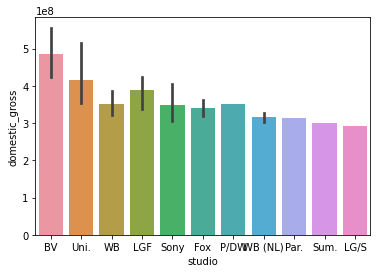

In [260]:
sns.barplot(data=perfoming_studios_data_df, x="studio", y="domestic_gross")

From the above visualization, it is clear that the studios BV,Uni,WB,LGF,Fox studio,P/DWWB, NL, Par,Sum and LG/S has produced movies with the highest domestic_gross making them best suitable for benchmarking

From the dataset 'performing_studios_data_pd' we can also analyze the top 20 best movies with the highest domestic gross also using a barplot

In [271]:
best_movies_df=perfoming_studios_df.head(5)
best_movies_df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


**OBJECTIVE 2: TO DETERMINE WHAT MOVIES ARE MORE PROFITABLE**

IN order to determine the movies that are  most profitable, we will need to use the `movie_budgets` to analyze the profitability.
* we will use the data to analyze the movies with the highest domestic gross incomes
* we will also use the data to analyze movies with high production costs


In [83]:
movie_budgets.head() # checks the outlook of the df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747


In [ ]:
movie_budgets.info() #checks the info

In [19]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\755616611.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')


id
1     425,000,000
2     410,600,000
3     350,000,000
4     330,600,000
5     317,000,000
         ...     
78          7,000
79          6,000
80          5,000
81          1,400
82          1,100
Name: production_budget, Length: 5782, dtype: object

In [20]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')
movie_budgets['production_budget']

id
1     425000000
2     410600000
3     350000000
4     330600000
5     317000000
        ...    
78         7000
79         6000
80         5000
81         1400
82         1100
Name: production_budget, Length: 5782, dtype: object

In [21]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
movie_budgets['domestic_gross']

id
1     760507625
2     241063875
3      42762350
4     459005868
5     620181382
        ...    
78            0
79        48482
80         1338
81            0
82       181041
Name: domestic_gross, Length: 5782, dtype: object

In [22]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
movie_budgets['domestic_gross']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\251121778.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')


id
1     760507625
2     241063875
3      42762350
4     459005868
5     620181382
        ...    
78            0
79        48482
80         1338
81            0
82       181041
Name: domestic_gross, Length: 5782, dtype: object

In [23]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['worldwide_gross']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4916\1044086559.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')


id
1     2,776,345,279
2     1,045,663,875
3       149,762,350
4     1,403,013,963
5     1,316,721,747
          ...      
78                0
79          240,495
80            1,338
81                0
82          181,041
Name: worldwide_gross, Length: 5782, dtype: object

In [24]:
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['worldwide_gross']

id
1     2776345279
2     1045663875
3      149762350
4     1403013963
5     1316721747
         ...    
78             0
79        240495
80          1338
81             0
82        181041
Name: worldwide_gross, Length: 5782, dtype: object

In [25]:
movie_budgets.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [26]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [27]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(float)
movie_budgets['production_budget']

id
1     425000000.0
2     410600000.0
3     350000000.0
4     330600000.0
5     317000000.0
         ...     
78         7000.0
79         6000.0
80         5000.0
81         1400.0
82         1100.0
Name: production_budget, Length: 5782, dtype: float64

In [28]:
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(float)
movie_budgets['domestic_gross']

id
1     760507625.0
2     241063875.0
3      42762350.0
4     459005868.0
5     620181382.0
         ...     
78            0.0
79        48482.0
80         1338.0
81            0.0
82       181041.0
Name: domestic_gross, Length: 5782, dtype: float64

In [31]:
>>> df = movie_budgets.fillna(0)
>>> df.worldwide_gross.astype(float)

id
1     2.776345e+09
2     1.045664e+09
3     1.497624e+08
4     1.403014e+09
5     1.316722e+09
          ...     
78    0.000000e+00
79    2.404950e+05
80    1.338000e+03
81    0.000000e+00
82    1.810410e+05
Name: worldwide_gross, Length: 5782, dtype: float64

In [32]:
movie_budgets.describe() #generates the statistical measures

,production_budget,domestic_gross
count,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07
std,4.181208e+07,6.824060e+07
min,1.100000e+03,0.000000e+00
25%,5.000000e+06,1.429534e+06
50%,1.700000e+07,1.722594e+07
75%,4.000000e+07,5.234866e+07
max,4.250000e+08,9.366622e+08


In [33]:
movie_budgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747


In [38]:
#checking the besp perfoming movies based on the domestic gross
movie_perf_df= movie_budgets.loc[movie_budgets['domestic_gross']>=movie_budgets['domestic_gross'].mean()]
movie_perf_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747
...,...,...,...,...,...
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034
8,"Jun 11, 2004",Napoleon Dynamite,400000.0,44540956.0,46122713


from the analysis above, there are 1760 movies with domestic gross which is equal to or greter than the mean.let us visually illustrate the seaborn barplot

In [43]:
#lets print the top 10 studios with highest domestic gross
ranked_movie_perf_df=movie_perf_df.sort_values(by=['domestic_gross'], ascending = False)
ranked_movie_perf_df.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2053311220
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279
42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1348258224
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200
43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2208208395
34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1648854864
27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1517935897
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747
44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1242520711


From the above data, we can see the top 10 movies with the highest domestic gross.

In [44]:
plotting_data=ranked_movie_perf_df.head(10)
plotting_data

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2053311220
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279
42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1348258224
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200
43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2208208395
34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1648854864
27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1517935897
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747
44,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1242520711


<AxesSubplot:xlabel='domestic_gross', ylabel='movie'>

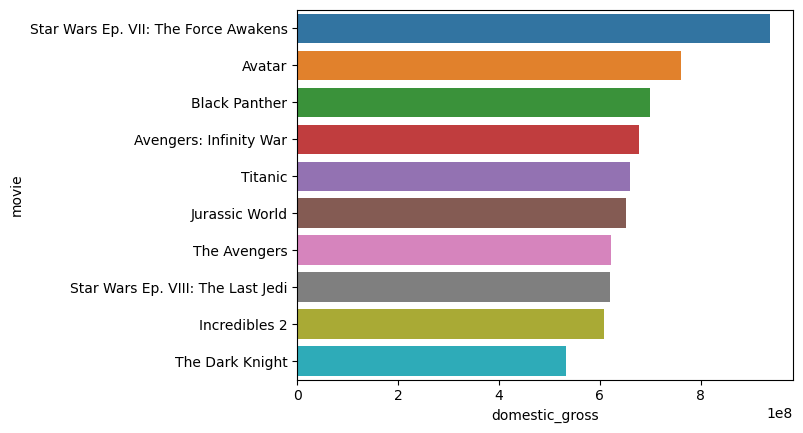

In [49]:
sns.barplot(data=plotting_data, x="domestic_gross", y="movie")
#generates a barplot illustating most profitable movies based on the domestic gross

Lets check on the most cost friendly movies to produce

In [68]:
movie_budgets['production_budget'].mean()

31587757.0965064

In [57]:
#checking the besp perfoming movies based on the domestic gross
cost_df= movie_budgets.loc[movie_budgets['production_budget']<=movie_budgets['production_budget'].mean()]
cost_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
20,"Aug 15, 1979",Apocalypse Now,31500000.0,78800000.0,81250485
21,"Apr 15, 2016",Criminal,31500000.0,14708696.0,38771262
22,"Apr 12, 2013",42,31000000.0,95020213.0,97470701
23,"Nov 2, 2012",Flight,31000000.0,93772375.0,160558438
24,"Dec 29, 1995",Mr. Hollandâs Opus,31000000.0,82582604.0,106282604
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0.0,0
79,"Apr 2, 1999",Following,6000.0,48482.0,240495
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338


From the Analysis above, there are 3963 observations whose production budgets are below the average budget for production.lets illustrate the distribution of the first 50 after ranking using a scaterplot

In [62]:
ranked_cost_df =cost_df.sort_values(by=['production_budget'], ascending = True)
ranked_cost_df.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041
81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338
79,"Apr 2, 1999",Following,6000.0,48482.0,240495
77,"Dec 31, 2004",The Mongol King,7000.0,900.0,900
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928
78,"Dec 31, 2018",Red 11,7000.0,0.0,0
76,"May 26, 2006",Cavite,7000.0,70071.0,71644
75,"Oct 8, 2004",Primer,7000.0,424760.0,841926


In [66]:
#lets illustrate the distribution using a sctter diagram for the first 20 observations
plotting_cost_df=ranked_cost_df.head(20)
plotting_cost_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041
81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338
79,"Apr 2, 1999",Following,6000.0,48482.0,240495
77,"Dec 31, 2004",The Mongol King,7000.0,900.0,900
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928
78,"Dec 31, 2018",Red 11,7000.0,0.0,0
76,"May 26, 2006",Cavite,7000.0,70071.0,71644
75,"Oct 8, 2004",Primer,7000.0,424760.0,841926


<AxesSubplot:xlabel='production_budget', ylabel='movie'>

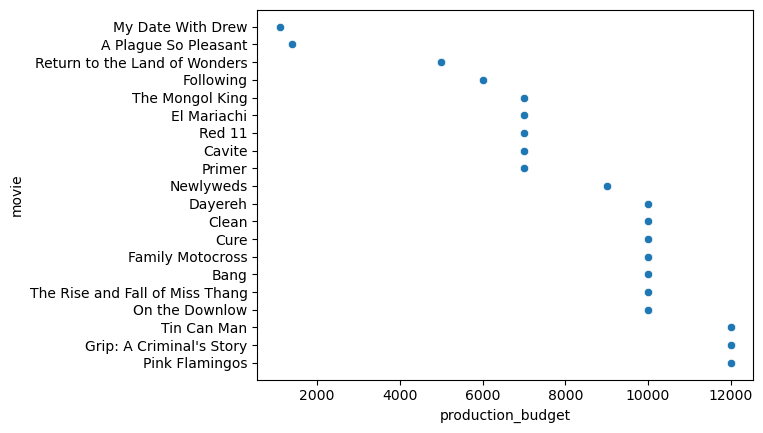

In [67]:
sns.scatterplot(data=plotting_cost_df, x="production_budget", y="movie") #generating a scatter plot

this is the distribution of the cost analysis when ascending =True, lets analyze the same when ascending = false

In [69]:
ranked_cost_df1 =cost_df.sort_values(by=['production_budget'], ascending = False)
ranked_cost_df1.head(50)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
20,"Aug 15, 1979",Apocalypse Now,31500000.0,78800000.0,81250485
21,"Apr 15, 2016",Criminal,31500000.0,14708696.0,38771262
28,"Jul 29, 2015",Vacation,31000000.0,58884188.0,102306500
34,"Aug 25, 2017",Birth of the Dragon,31000000.0,6901965.0,7220490
32,"Sep 28, 2001",Hearts in Atlantis,31000000.0,24185781.0,30885781
31,"Apr 28, 2000",Frequency,31000000.0,44983704.0,68079671
30,"Feb 13, 2019",Isnât it Romantic,31000000.0,48791187.0,48791187
29,"Jul 18, 1990",Arachnophobia,31000000.0,53208180.0,53208180
33,"Jan 22, 2010",Extraordinary Measures,31000000.0,12482741.0,15826984


In [70]:
#lets illustrate the distribution using a sctter diagram for the first 20 observations
plotting_cost_df1=ranked_cost_df1.head(20)
plotting_cost_df1

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
20,"Aug 15, 1979",Apocalypse Now,31500000.0,78800000.0,81250485
21,"Apr 15, 2016",Criminal,31500000.0,14708696.0,38771262
28,"Jul 29, 2015",Vacation,31000000.0,58884188.0,102306500
34,"Aug 25, 2017",Birth of the Dragon,31000000.0,6901965.0,7220490
32,"Sep 28, 2001",Hearts in Atlantis,31000000.0,24185781.0,30885781
31,"Apr 28, 2000",Frequency,31000000.0,44983704.0,68079671
30,"Feb 13, 2019",Isnât it Romantic,31000000.0,48791187.0,48791187
29,"Jul 18, 1990",Arachnophobia,31000000.0,53208180.0,53208180
33,"Jan 22, 2010",Extraordinary Measures,31000000.0,12482741.0,15826984


In [71]:
#lets illustrate the distribution using a sctter diagram for the first 20 observations
plotting_cost_df1=ranked_cost_df1.head(20)
plotting_cost_df1

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
20,"Aug 15, 1979",Apocalypse Now,31500000.0,78800000.0,81250485
21,"Apr 15, 2016",Criminal,31500000.0,14708696.0,38771262
28,"Jul 29, 2015",Vacation,31000000.0,58884188.0,102306500
34,"Aug 25, 2017",Birth of the Dragon,31000000.0,6901965.0,7220490
32,"Sep 28, 2001",Hearts in Atlantis,31000000.0,24185781.0,30885781
31,"Apr 28, 2000",Frequency,31000000.0,44983704.0,68079671
30,"Feb 13, 2019",Isnât it Romantic,31000000.0,48791187.0,48791187
29,"Jul 18, 1990",Arachnophobia,31000000.0,53208180.0,53208180
33,"Jan 22, 2010",Extraordinary Measures,31000000.0,12482741.0,15826984


<AxesSubplot:xlabel='production_budget', ylabel='movie'>

C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


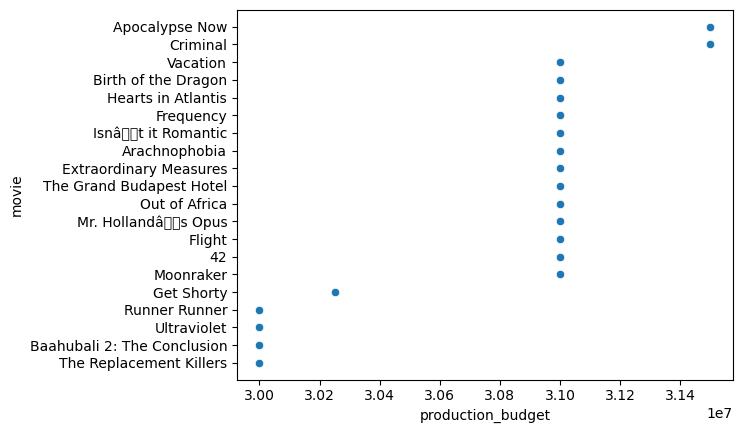

In [72]:
sns.scatterplot(data=plotting_cost_df1, x="production_budget", y="movie") #generating a scatter plot

From the above analysis, it is clear that most movies are distributed near the data mean value with very few movies being produced ith amount way lesser than the mean

In [82]:
data_df= movie_budgets.loc[movie_budgets['domestic_gross']> movie_budgets['production_budget']]
data_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2776345279
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1316721747
6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2053311220
7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2048134200
...,...,...,...,...,...
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928
75,"Oct 8, 2004",Primer,7000.0,424760.0,841926
76,"May 26, 2006",Cavite,7000.0,70071.0,71644


From this analysis of this objective we can make the following observations
* The top ten movies with high domestic gross represent most profitable movies. the microsoft company can choose to produce movies similar to thse ones in order to attain more profits from the same
* There are 2677 movies whose production costs are less than the domestic gross which translates into profits. microsoft can chose to produce movies which require lesser production cost than the top perfoming movies and still make profits. this option will optimize on resources and enable production of mutiple movies using resonable production_budgets

**OBJECTIVE 3: TO DETERMINE THE MOST PRODUCED MOVIE GENRES**
    

In this objective, we will use the `title_basics`data to analyze the genre which is mostly produced.this analysis is relevant to the project task in that;
* we will be able to cross check whether the most profitable movies identidied in the previous analysis falls into the category of most produced genres
* we will be able to cross chek whether the cost effective movies identified, falls in the category of most produced movies

title_basics.head()

In [119]:
by_genres= title_basics.sort_values(by='genres', ascending=False)
by_genres.head(50)

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt10244910,"C- Bar, II","C- Bar, II",2019,64.0,Western
tt4892706,The Trouble,The Trouble,2018,NaN,Western
tt5090548,The Devil Came Up From Texas,The Devil Came Up From Texas,2016,46.0,Western
tt2175016,The Redemption of Henry Myers,The Redemption of Henry Myers,2014,101.0,Western
tt6469146,Krasny,Krasny,2016,86.0,Western
tt4893452,Winnetou & Old Shatterhand,Winnetou & Old Shatterhand,2016,117.0,Western
tt7790254,Jesse James vs. The Black Train,Jesse James vs. The Black Train,2018,80.0,Western
tt3125566,Boomtown,Boomtown,2013,NaN,Western
tt4985906,Any Bullet Will Do,Any Bullet Will Do,2018,110.0,Western


From our dataset`title_basics` we willanalyze the genres of movies that are mostly produced. we will then try to visualize the top ten most produced genres.

In the cell below, lets group the data by genre then sort it out using the 'primary_title' in order to derive the genres most produced

In [120]:
my_genre = title_basics.groupby('genres', as_index=False)['primary_title'].count().sort_values(by='primary_title', ascending=False)
my_genre.head(50)

,genres,primary_title
694,Documentary,32185
794,Drama,21486
494,Comedy,9177
992,Horror,4372
527,"Comedy,Drama",3519
1078,Thriller,3046
0,Action,2219
433,"Biography,Documentary",2115
872,"Drama,Romance",2079
537,"Comedy,Drama,Romance",1558


In [121]:
genre_plot=my_genre.head(20) #generates the top 20 genres mostly procuced and which we will use for our visualization.
genre_plot

,genres,primary_title
694,Documentary,32185
794,Drama,21486
494,Comedy,9177
992,Horror,4372
527,"Comedy,Drama",3519
1078,Thriller,3046
0,Action,2219
433,"Biography,Documentary",2115
872,"Drama,Romance",2079
537,"Comedy,Drama,Romance",1558


<AxesSubplot:xlabel='primary_title', ylabel='genres'>

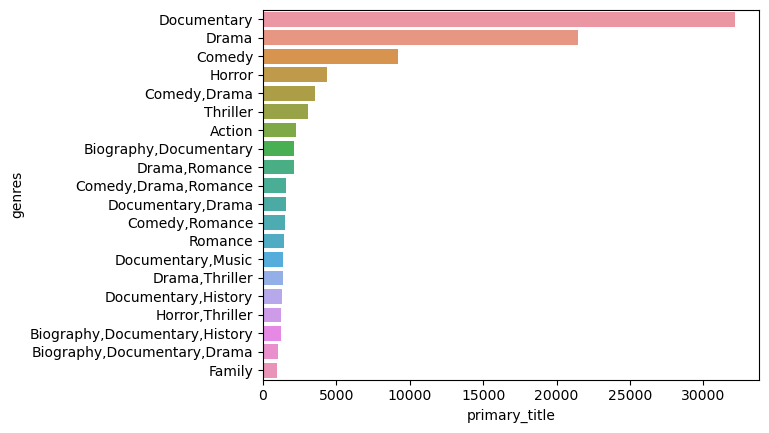

In [123]:
sns.barplot(data=genre_plot, x="primary_title", y="genres")
#generates a barplot illustating most produced movie genres based on the title_basics dataset

**CONCLUSION**

From this analysis we can make the following conclusions 

* Studios BV,Uni,WB,LGF,Fox studio,P/DWWB, NL, Par,Sum and LG/S has produced movies with the highest domestic_gross making them best suitable for benchmarking
* The top ten movies with high domestic gross represent most profitable movies. the microsoft company can choose to produce movies similar to thse ones in order to attain more profits from the same
* There are 2677 movies whose production costs are less than the domestic gross which translates into profits. microsoft can chose to produce movies which require lesser production cost than the top perfoming movies and still make profits. this option will optimize on resources and enable production of mutiple movies using resonable production_budgets
* From the analysis of the genres mostly produced, microsoft should therefore consider producing  movie of the top ten genres mostly produced